# EDA on Lamudi dataset

This notebook will cover explanatory data analysis using the collected data for Lamudi.

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data - Lamudi condominiums for Rent

The data collected consists of listings of condominiums for rent that was gathered on May 23, 2021. 

In [2]:
data = pd.read_csv(r"C:\Users\Clarisa Hilario\Desktop\condominiums.csv")
data.head()

,name,address,price,bedroom,bath,floorarea (m²),amenities,Daycare Center,Social hall,Billiards table,...,Powder room,Air conditioning,Secure parking,Pay TV access,rating,location,point,city,lat,long
0,"Grand Hyatt Residences: 3BR For Rent, 133 sqm,...","8th Avenue corner 36th Street, BGC Fort Bonifa...",130000,3,4,133,"Secure parking ,",0,0,0,...,0,0,1,0,4.19,NaN,NaN,NaN,0.000000,0.000000
1,Bi Level Penthouse Unit with Pool at McKinley ...,"Philippines, Taguig City, Le Grand Ave Fort Bo...",295000,3,4,220,"Swimming pool ,",0,0,0,...,0,0,0,0,4.19,"Unilever Philippines, 2nd Avenue, Fort Bonifac...","(14.5546834, 121.0452905, 0.0)",Taguig,14.531508,121.034749
2,For Rent: 1BR Condo unit in The Viceroy,"Fort Bonifacio, Taguig",28000,1,1,34,"CCTV ,Air conditioning ,Alarm System ,Elevator...",1,0,0,...,0,1,0,0,4.77,"Fort Bonifacio, Taguig, Southern Manila Distri...","(14.5492496, 121.0506413, 0.0)",Taguig,14.549250,121.050641
3,For Rent: Rada Regency One Bedroom Condo With ...,"100 Rada Corner Dela Rosa Sts., Legazpi Villag...",25000,1,1,42,"Gymnasium ,CCTV ,Air conditioning ,Alarm Syste...",0,0,0,...,0,1,1,0,4.19,NaN,NaN,NaN,0.000000,0.000000
4,For Rent : New Studio at Pines Peak Tower 1,"Pines Corner Union Sts., Barangka, Mandaluyong...",12000,1,1,20,"Gymnasium ,CCTV ,Air conditioning ,Alarm Syste...",0,1,0,...,0,1,1,1,4.83,NaN,NaN,NaN,0.000000,0.000000


### Prepare the Data

Check how the amenities are listed.

In [3]:
list(data['amenities'])

['Secure parking ,',
 'Swimming pool ,',
 'CCTV ,Air conditioning ,Alarm System ,Elevators ,Fire exits ,Fitness center ,Function Room ,Lobby ,Reception Area ,Smoke detector ,Wi-Fi ,Daycare Center ,Fire Alarm ,24-hour security ,Deck ,Swimming pool ,',
 'Gymnasium ,CCTV ,Air conditioning ,Alarm System ,Balcony ,Elevators ,Fire exits ,Gym ,Health Club ,Lobby ,Sauna ,Shower rooms ,Sauna ,Open space ,24-hour security ,Gazebos ,Spa ,Shops ,Balcony ,Deck ,Fully fenced ,Garage ,Garden ,Gazebo ,Health Club ,Jacuzzi ,Jogging path ,Landscaped Garden ,Parking lot ,Parks ,Playground ,Secure parking ,Swimming pool ,',
 'Gymnasium ,CCTV ,Air conditioning ,Alarm System ,Balcony ,Basement Parking ,Broadband internet available ,Built-in wardrobes ,Business Center ,Clinic ,Club House ,Elevators ,Ensuite ,Entertainment room ,Fire exits ,Fitness center ,Function Room ,Gym ,Health Club ,Lobby ,Lounge ,Meeting rooms ,Multi-Purpose Hall ,Pay TV access ,Reception Area ,Sauna ,Shower rooms ,Smoke detector ,Soci

Count the amenties offered using `str.split()` command. Since there is an excess " ," we decrement the length of the splitted string.

In [18]:
data['num_amenities'] = (data['amenities'].str.split(" ,").str.len())-1


Check the resulting dataset.

In [19]:
data.head()

,name,address,price,bedroom,bath,floorarea (m²),amenities,Daycare Center,Social hall,Billiards table,...,Air conditioning,Secure parking,Pay TV access,rating,location,point,city,lat,long,num_amenities
0,"Grand Hyatt Residences: 3BR For Rent, 133 sqm,...","8th Avenue corner 36th Street, BGC Fort Bonifa...",130000,3,4,133,"Secure parking ,",0,0,0,...,0,1,0,4.19,NaN,NaN,NaN,0.000000,0.000000,1.0
1,Bi Level Penthouse Unit with Pool at McKinley ...,"Philippines, Taguig City, Le Grand Ave Fort Bo...",295000,3,4,220,"Swimming pool ,",0,0,0,...,0,0,0,4.19,"Unilever Philippines, 2nd Avenue, Fort Bonifac...","(14.5546834, 121.0452905, 0.0)",Taguig,14.531508,121.034749,1.0
2,For Rent: 1BR Condo unit in The Viceroy,"Fort Bonifacio, Taguig",28000,1,1,34,"CCTV ,Air conditioning ,Alarm System ,Elevator...",1,0,0,...,1,0,0,4.77,"Fort Bonifacio, Taguig, Southern Manila Distri...","(14.5492496, 121.0506413, 0.0)",Taguig,14.549250,121.050641,16.0
3,For Rent: Rada Regency One Bedroom Condo With ...,"100 Rada Corner Dela Rosa Sts., Legazpi Villag...",25000,1,1,42,"Gymnasium ,CCTV ,Air conditioning ,Alarm Syste...",0,0,0,...,1,1,0,4.19,NaN,NaN,NaN,0.000000,0.000000,33.0
4,For Rent : New Studio at Pines Peak Tower 1,"Pines Corner Union Sts., Barangka, Mandaluyong...",12000,1,1,20,"Gymnasium ,CCTV ,Air conditioning ,Alarm Syste...",0,1,0,...,1,1,1,4.83,NaN,NaN,NaN,0.000000,0.000000,61.0


## Explanatory Data Analysis
The following will be done:
1. Examine the size and structure of the data
2. Examine each field individually
3. Examine relationships/correlations
4. Identify anomalies/outliers

### 1. Size and structure of the data

In [4]:
data.shape

(3000, 106)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 106 entries, name to long
dtypes: float64(3), int64(97), object(6)
memory usage: 2.4+ MB


The dataset has three dataypes: float and integer values as well as strings.

In [6]:
data.describe()

,price,bedroom,bath,floorarea (m²),Daycare Center,Social hall,Billiards table,Shower rooms,Swimming pool,Business Center,...,Theater,Shops,Pool bar,Powder room,Air conditioning,Secure parking,Pay TV access,rating,lat,long
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,...,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2672.000000,3000.000000,3000.000000
mean,68140.815333,1.656333,1.575000,78.849667,0.000667,0.001000,0.000333,0.003000,0.01100,0.002333,...,0.0,0.004000,0.000667,0.000667,0.006667,0.004667,0.001667,4.238222,9.719554,80.815721
std,59484.990403,0.748608,1.080168,63.275058,0.025816,0.031612,0.018257,0.054699,0.10432,0.048256,...,0.0,0.063129,0.025816,0.025816,0.081391,0.068165,0.040798,0.466169,6.860054,57.026414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000,0.000000,0.000000
25%,26000.000000,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.990000,0.000000,0.000000
50%,50000.000000,1.000000,1.000000,60.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.190000,14.549250,121.026594
75%,90000.000000,2.000000,2.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.520000,14.563168,121.050641
max,462000.000000,4.000000,32.000000,435.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.990000,14.679676,124.895471


With the following quantitative, price, bedroom, bath and floorarea will be observed. Here we will focus on the values for price, bedroom, bath, floorarea and rating since other variables are categorical and values for coodinate systems.

Few insights from the results:
1. There is a large difference between the maximum and the 75th percentile values of price, bath and floorarea.
2. There are large differences between the 25th percentile and the minimum for price and floorarea.
3. The observations mentioned above may indicate possible outliers in the data.

In [7]:
data.describe(include=np.object)

,name,address,amenities,location,point,city
count,3000,3000,2618,2058,2058,2001
unique,2810,1313,1908,336,358,10
top,"1 Bedroom Unit for Rent at The Grove, Ugong Pasig","Fort Bonifacio, Taguig","Alarm System ,Elevators ,Fire exits ,Lobby ,24...","Fort Bonifacio, Taguig, Southern Manila Distri...","(14.5492496, 121.0506413, 0.0)",Makati
freq,13,495,196,496,496,756


These are the descriptive statistics for the categorical variables.

## 2. Examining individual variables

Simple visual generation will be done to better understand the values in each variable.

### Condominiums per city

In [20]:
cities = data["city"].value_counts().rename_axis('Cities').reset_index(name='counts')
cities = cities.nlargest(10, 'counts')
cities

,Cities,counts
0,Makati,756
1,Taguig,684
2,Quezon City,218
3,Pasig,138
4,Mandaluyong,115
5,Manila,41
6,Pasay,33
7,Muntinlupa,9
8,Parañaque,6
9,Las Piñas,1


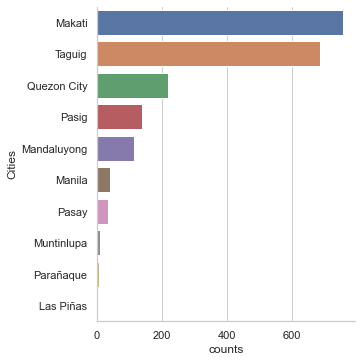

In [21]:
sns.set_theme(style="whitegrid")
city_plot = sns.catplot(y = "Cities", x="counts", orient="h", kind="bar", data=cities)
#city_plot.set(ylim=(0, 50))

There are more listings of condominiums for rent in Makati and Taguig compared to other cities.

### Number of bedrooms offered per condominium

In [22]:
bdroom = data["bedroom"].value_counts().rename_axis('Bedrooms').reset_index(name='counts')
bdroom = bdroom.nlargest(10, 'counts')
bdroom

,Bedrooms,counts
0,1,1522
1,2,986
2,3,485
3,4,5
4,0,2


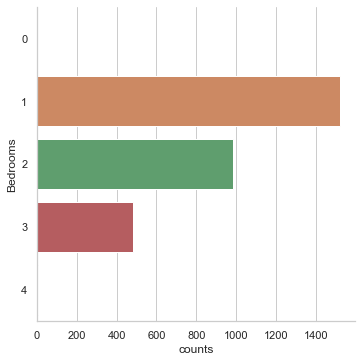

In [26]:
sns.set_theme(style="whitegrid")
bdr_plot = sns.catplot(y = "Bedrooms", x="counts", orient="h", kind="bar", data=bdroom)
#bdr_plot.set(xlim=(0, 1200))

There are more listings of condominiums for rent that only offer 1 bedroom.

### Number of bathrooms offered per condominium

In [27]:
bthroom = data["bath"].value_counts().rename_axis('Bathrooms').reset_index(name='counts')
bthroom = bthroom.nlargest(10, 'counts')
bthroom

,Bathrooms,counts
0,1,1619
1,2,749
2,3,388
3,0,148
4,4,64
5,5,30
6,32,1
7,6,1


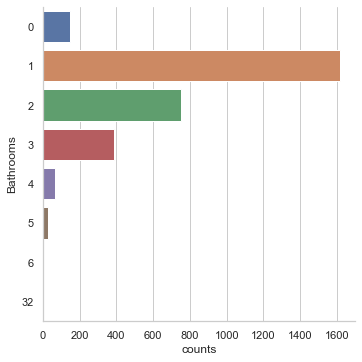

In [28]:
sns.set_theme(style="whitegrid")
bth_plot = sns.catplot(y = "Bathrooms", x="counts", orient="h", kind="bar", data=bthroom)
#bdr_plot.set(xlim=(0, 1200))

There are more listings of condominiums for rent that offer only 1 bathroom.

### Floorarea of condominiums for rent

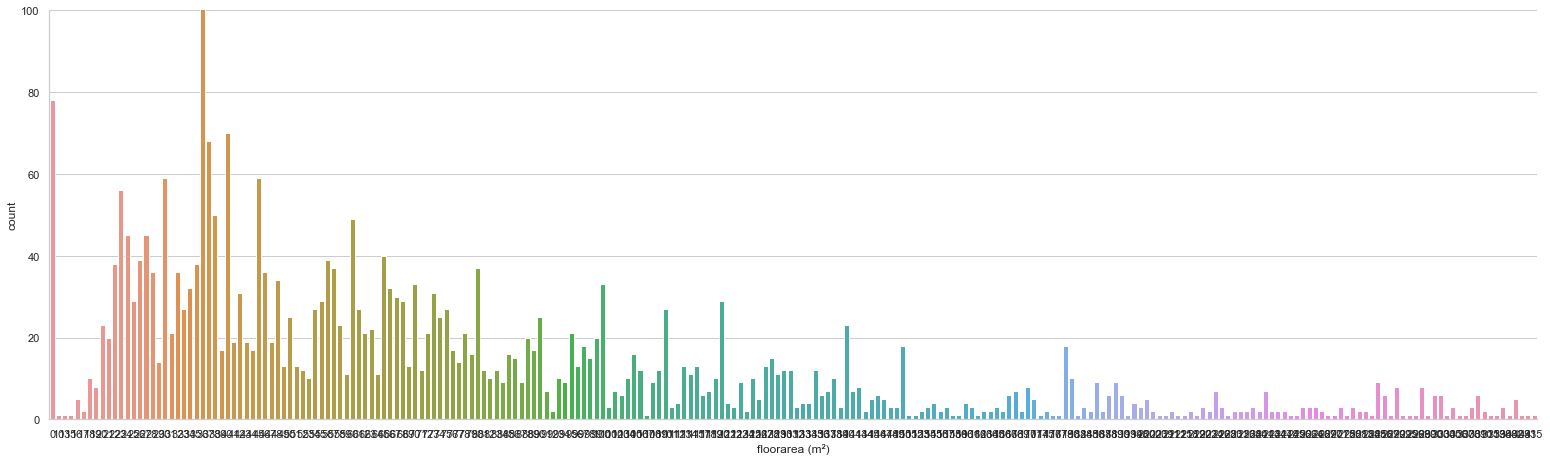

In [34]:
flr_plot = sns.catplot(x="floorarea (m²)", kind="count", data=data)
flr_plot.set(ylim=(0,100))
flr_plot.fig.set_size_inches(25, 6.5)

There are more listings of condominiums that offer smaller floorareas.

Price and Floor Area

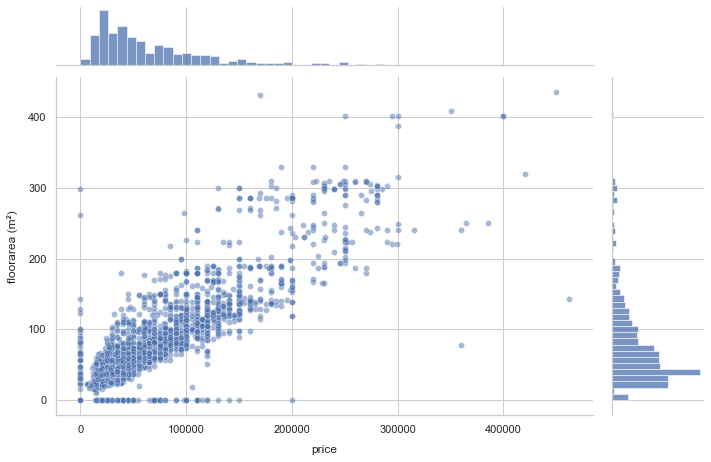

In [41]:
price_floorarea_plot = sns.jointplot(data = data, 
                                   y="floorarea (m²)", 
                                   x="price", 
                                   alpha=0.5)
price_floorarea_plot.set_axis_labels("price", "floorarea (m²)", labelpad=10)
price_floorarea_plot.fig.set_size_inches(10.5, 6.5)

The floor area and rental price offer has almost a linear relationship where if the rental price offer increases the floor area increases.  

### Ratings per condominium listing

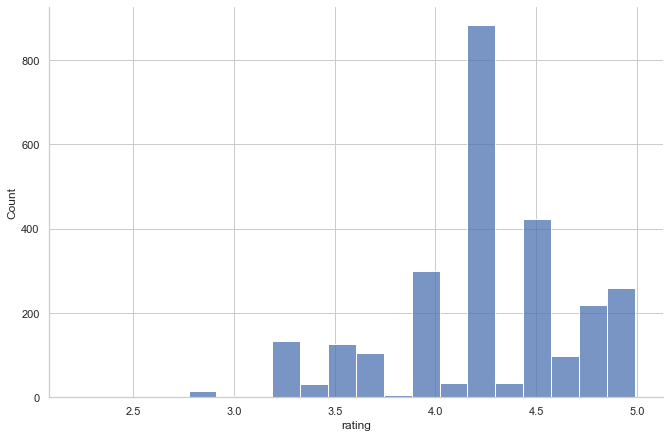

In [36]:
rating_plot = sns.displot(data, x="rating", bins=20)

rating_plot.fig.set_size_inches(10.5, 6.5)

The ratings for most listings of condominiums for rent are between 4.0 and 4.5

### Amenities

In [21]:
amenities_count = data["num_amenities"].value_counts().rename_axis('Amenities per Condo').reset_index(name='counts')
amenities_count = amenities_count.nlargest(100, 'counts')
amenities_count

,Amenities per Condo,counts
0,6.0,364
1,12.0,131
2,7.0,122
3,9.0,120
4,13.0,119
...,...,...
68,68.0,1
66,83.0,1
65,89.0,1
64,57.0,1


In [43]:
for a in amenities:
    print(a)

Shower rooms
Golf Area
Utility room
Reception Area
Indoor Tree House
Spa
Fitness center
Tennis court
Landscaped Garden
Drying area
Deck
Maid's room
Amphitheater
Courtyard
Gymnasium
Badminton court
Indoor spa
Jogging path
Wi-Fi
Swimming pool
Central air conditioning
Powder room
Gazebo
Sports facilities
Pool bar
Open car spaces
Secure parking
Parks
Gym
Pay TV access
Parking lot
Carport
Garden
Gas heating
Game Room
Theater
Business Center
Sky lounge
Entertainment room
Laundry Area
Air conditioning
24-hour security
Indoor Pool
Multi-purpose lawn
Floorboards
Split-system heating
Lounge
Meeting rooms
Social hall
Outdoor spa
Fire exits
Sauna
Shops
Balcony
Clinic
Daycare Center
Lobby
Study area
Fire sprinkler system
Club House
Playground
Smoke detector
Open space
Health Club
Fully fenced
Ensuite
Bar
Remote garage
Function area
Drying Area
Garage
Fire Alarm
Library
Maids Room
Study room
Elevators
CCTV
Broadband internet available
Built-in wardrobes
Gazebos
Basketball court
Multi-Purpose Hall
Al

The list above are the possible amenities that can be offered in each condominium for rent.

C:\Users\Clarisa Hilario\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


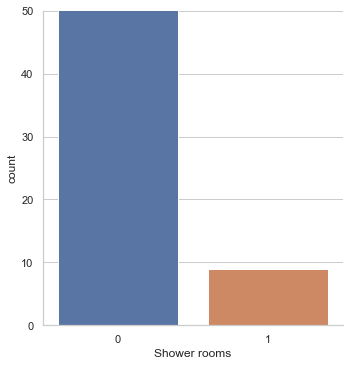

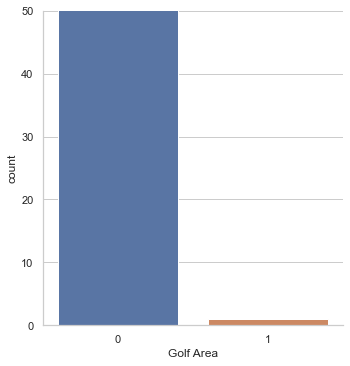

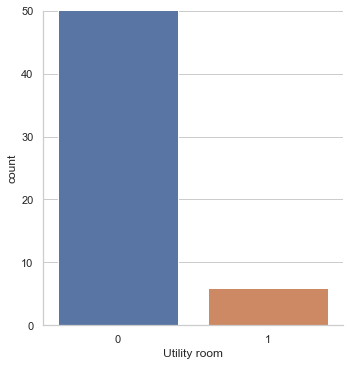

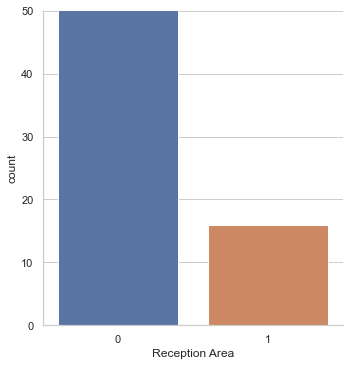

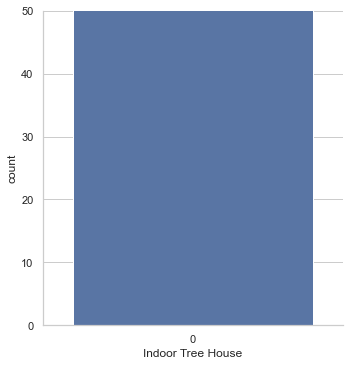

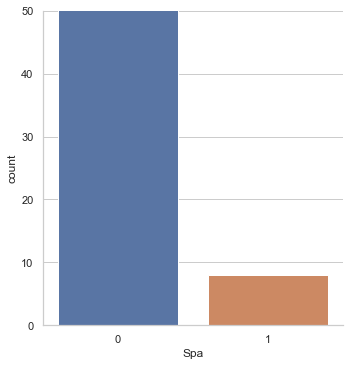

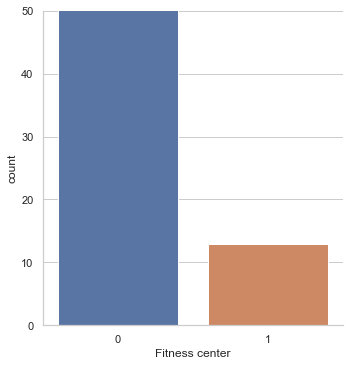

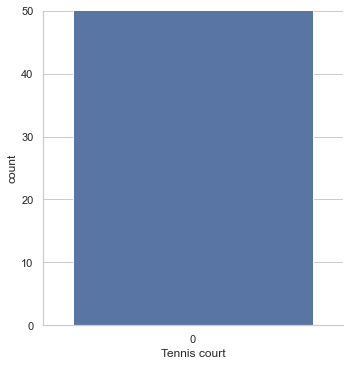

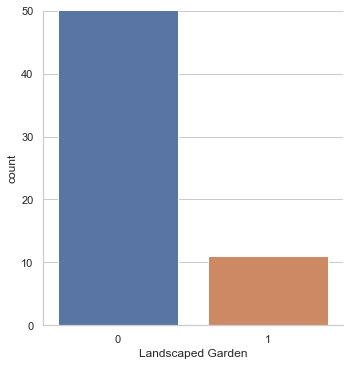

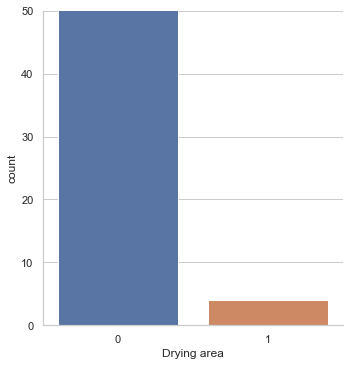

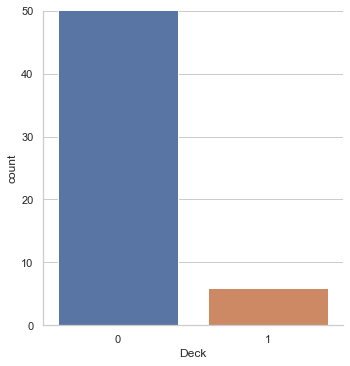

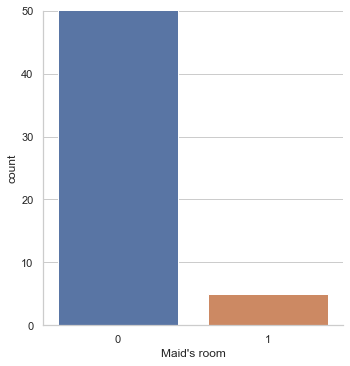

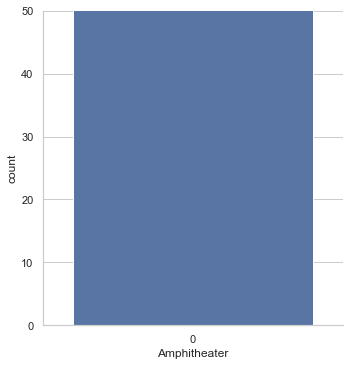

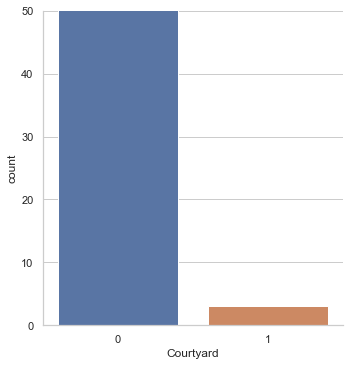

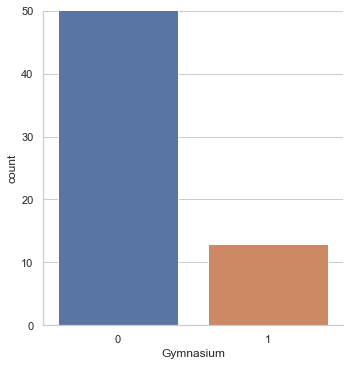

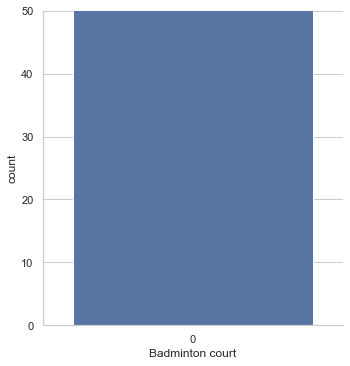

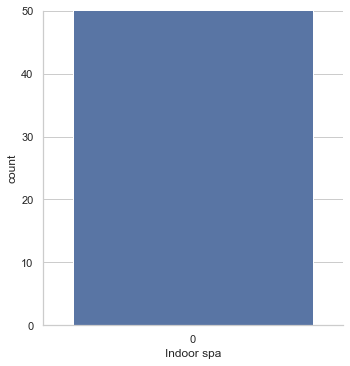

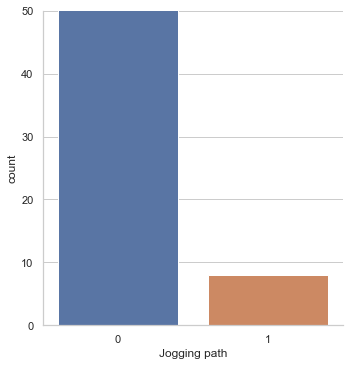

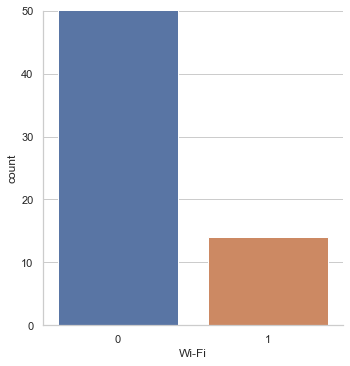

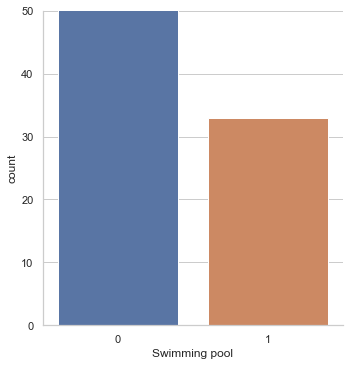

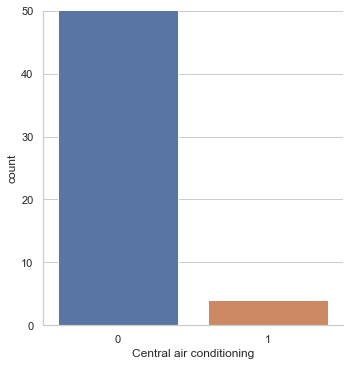

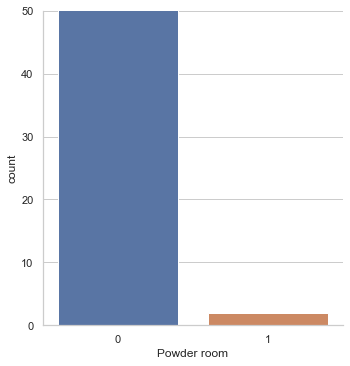

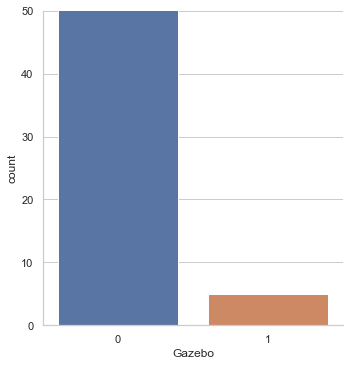

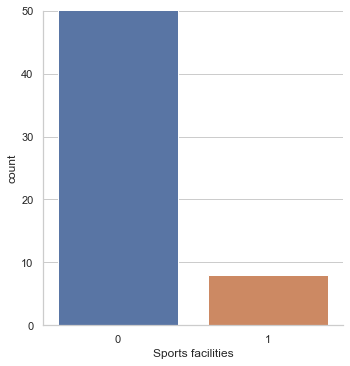

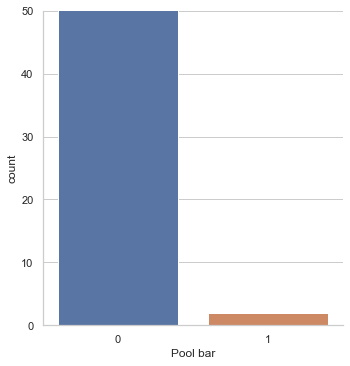

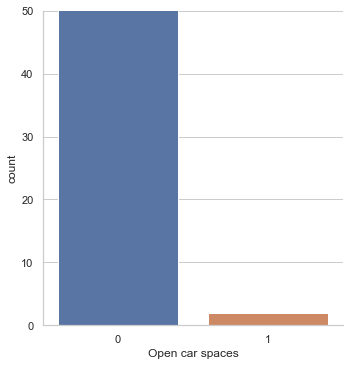

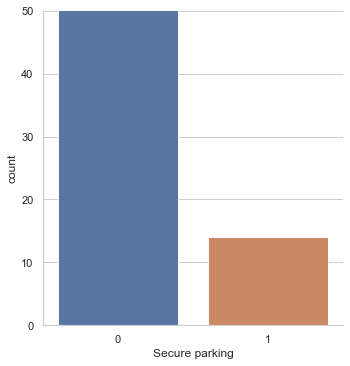

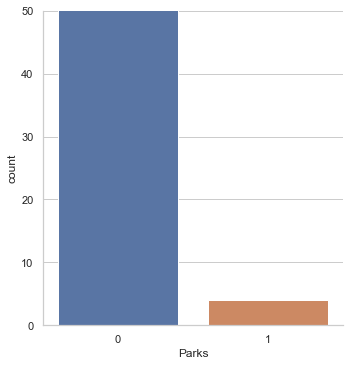

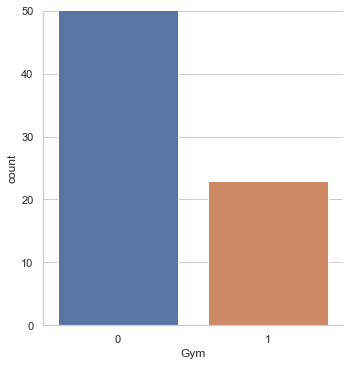

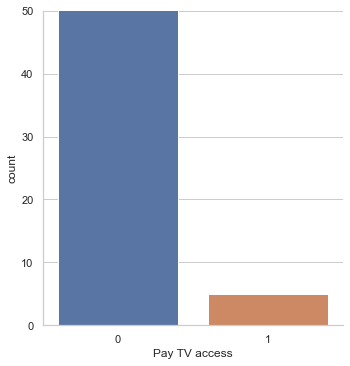

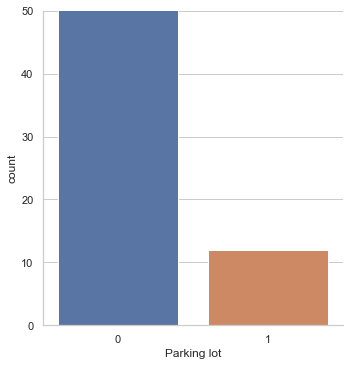

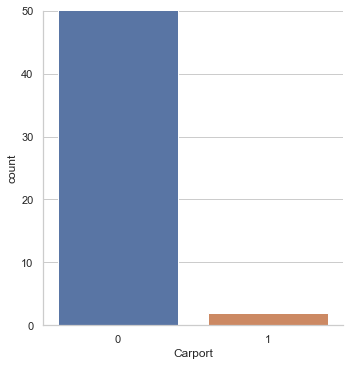

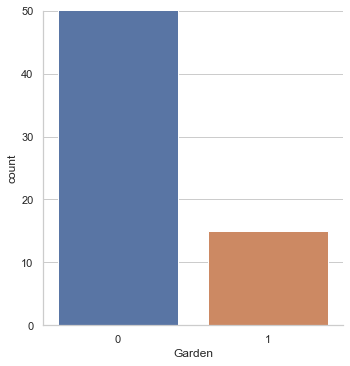

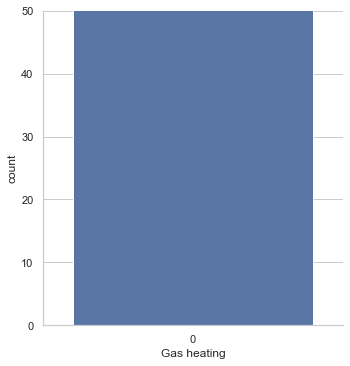

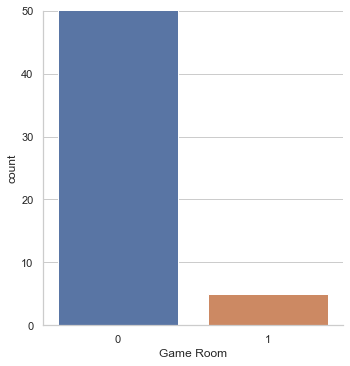

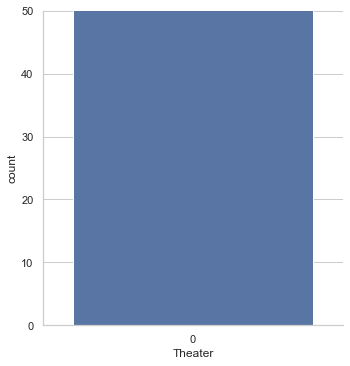

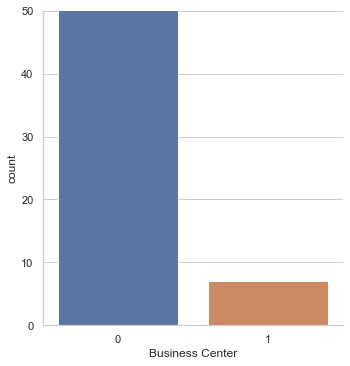

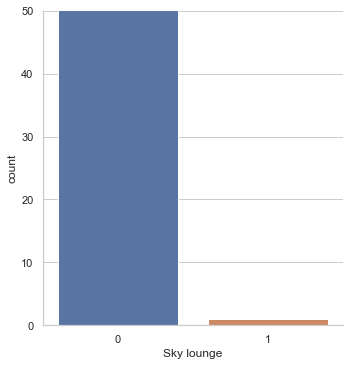

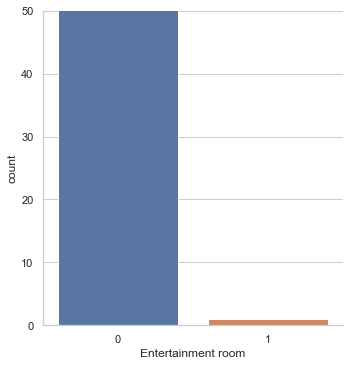

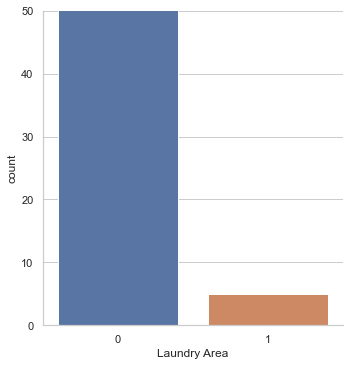

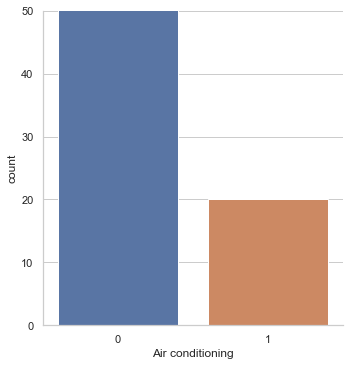

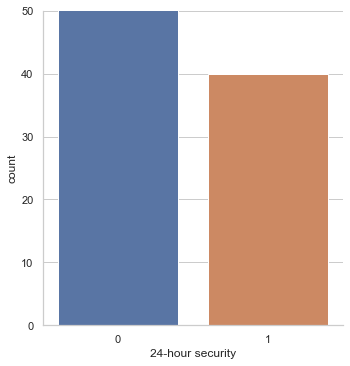

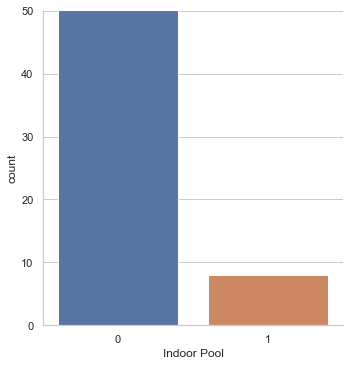

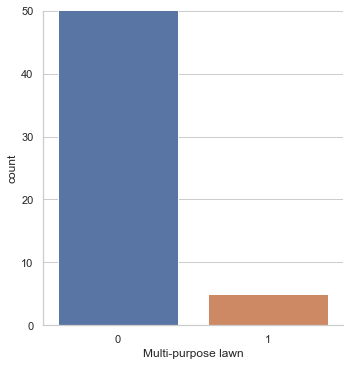

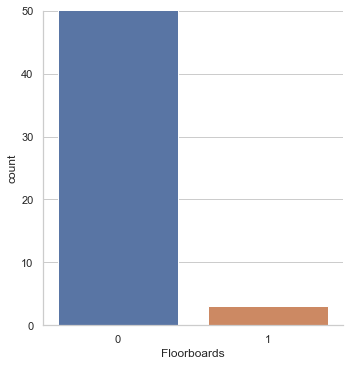

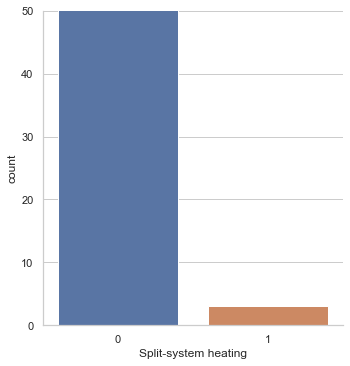

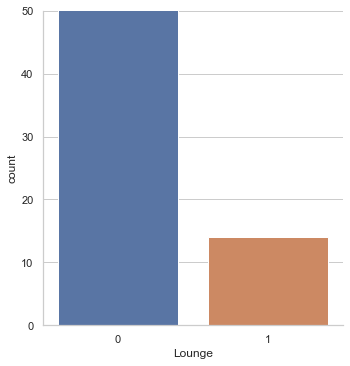

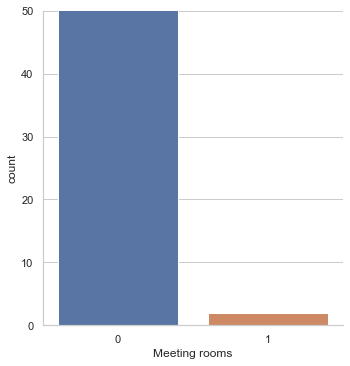

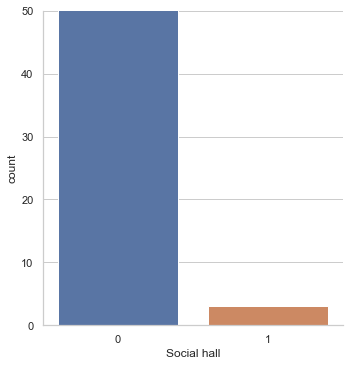

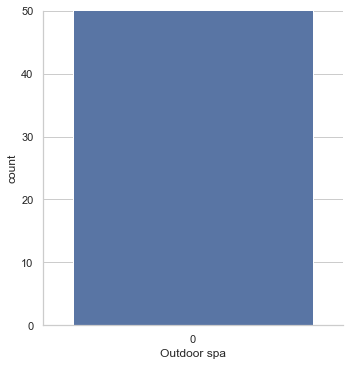

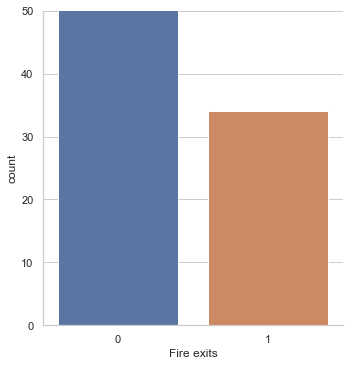

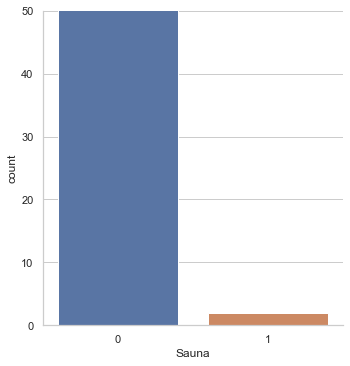

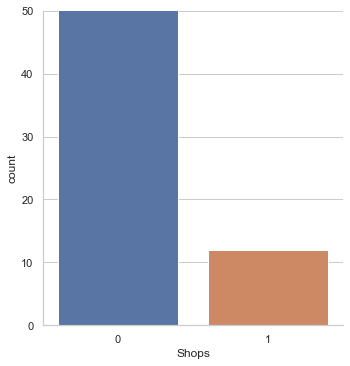

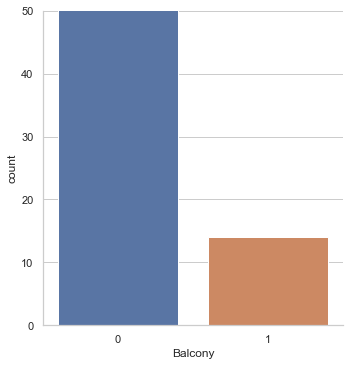

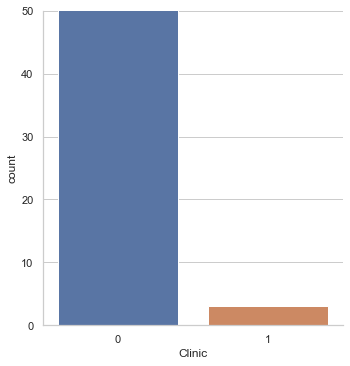

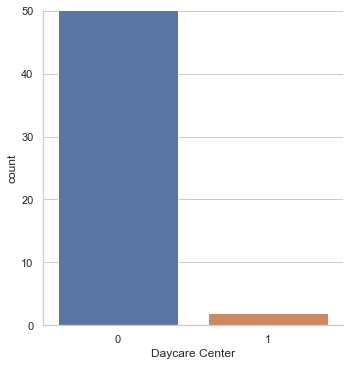

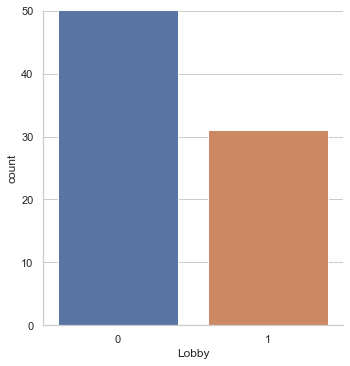

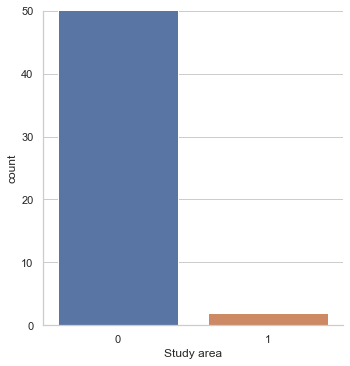

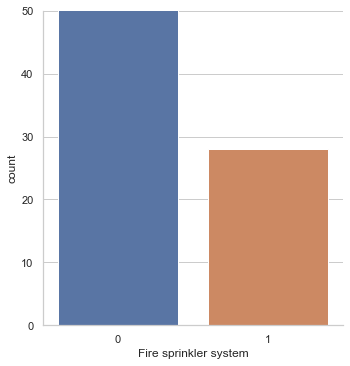

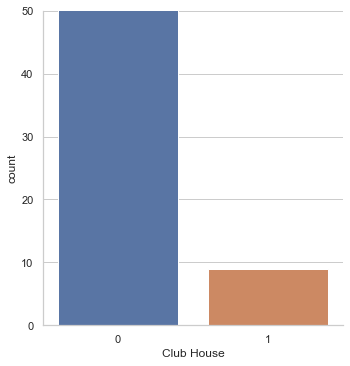

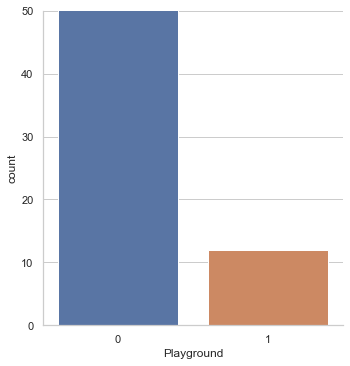

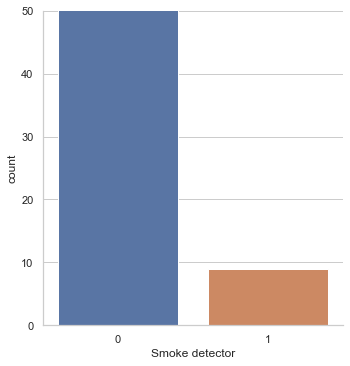

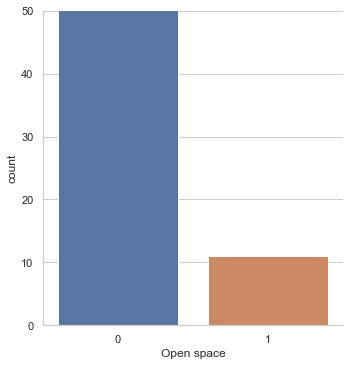

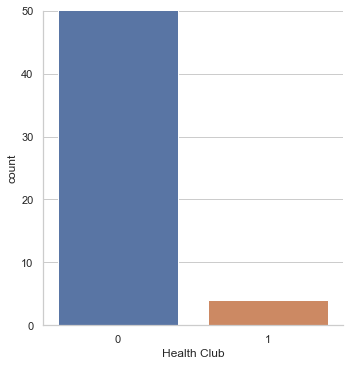

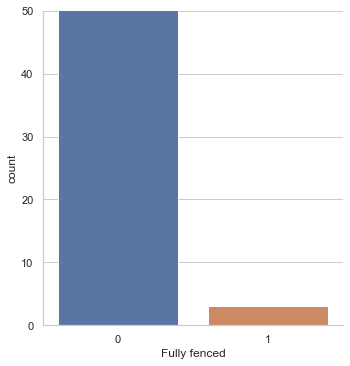

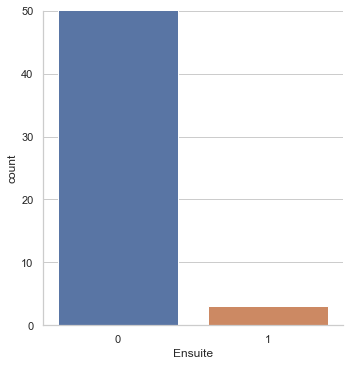

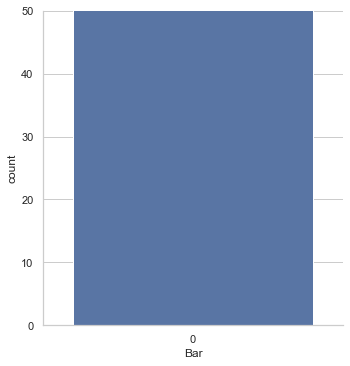

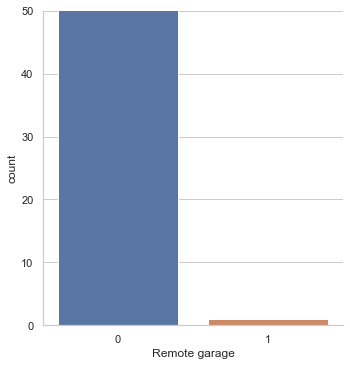

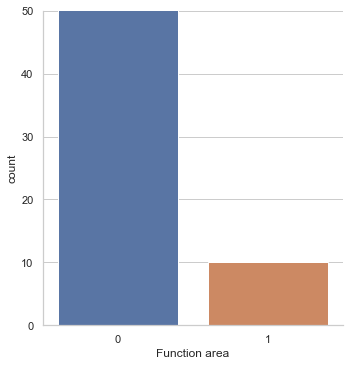

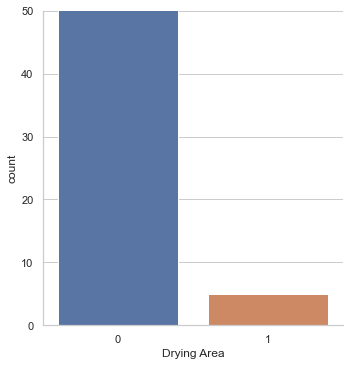

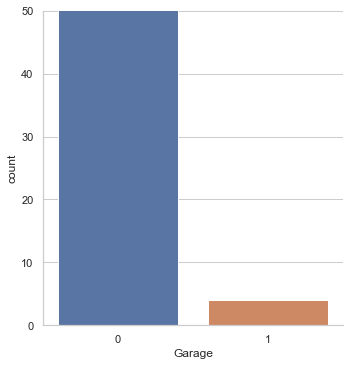

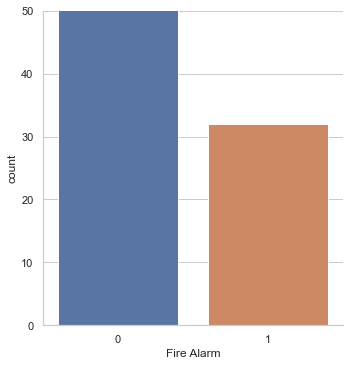

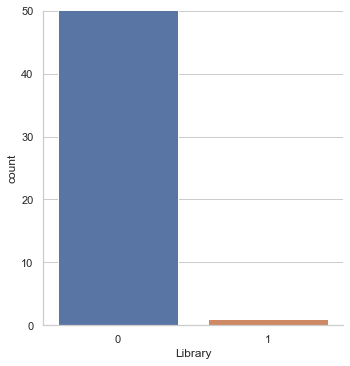

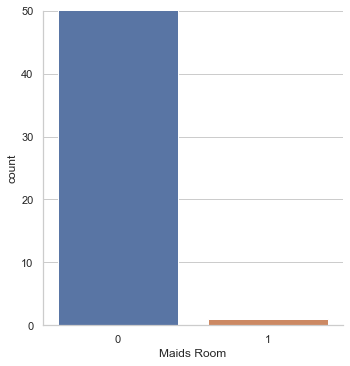

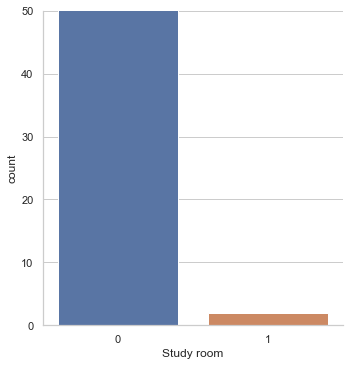

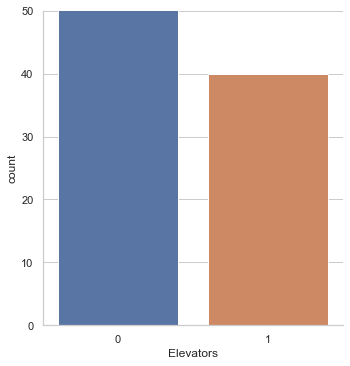

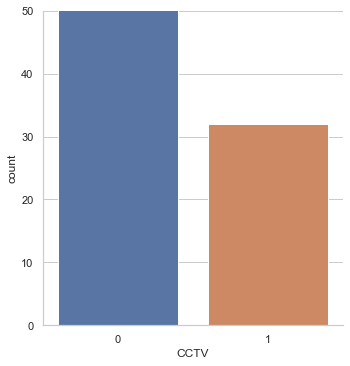

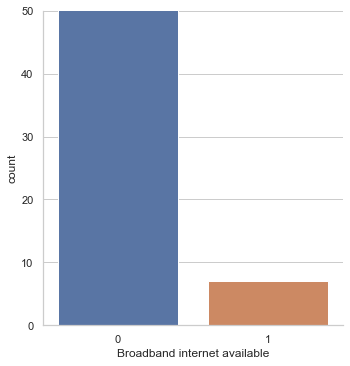

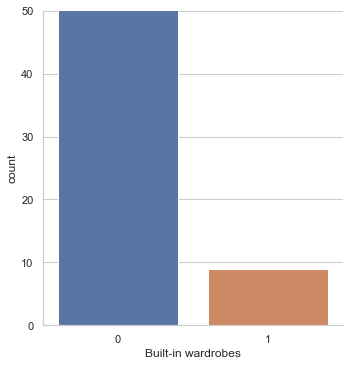

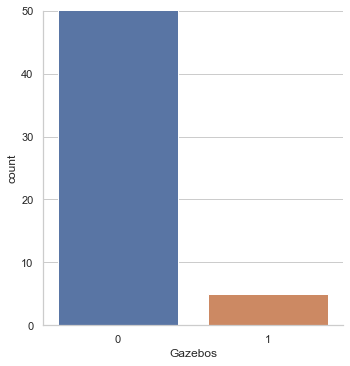

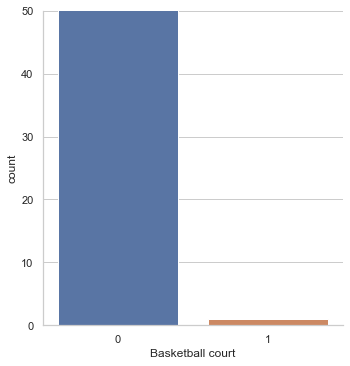

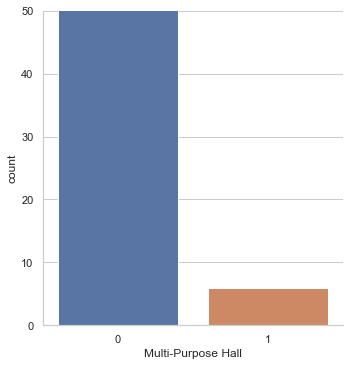

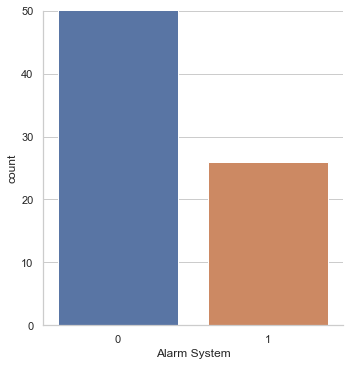

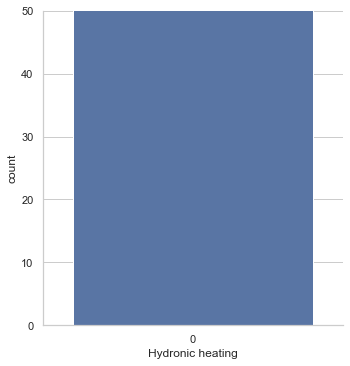

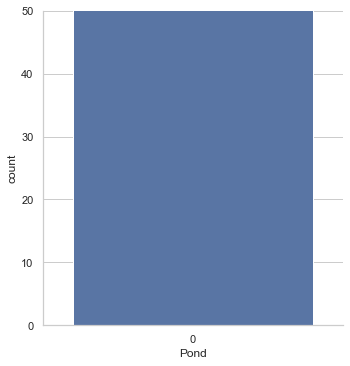

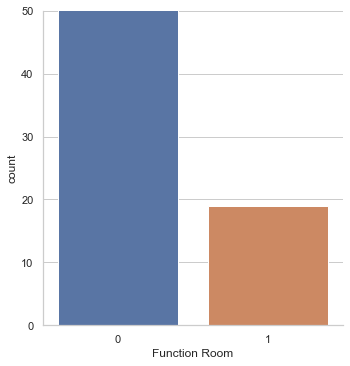

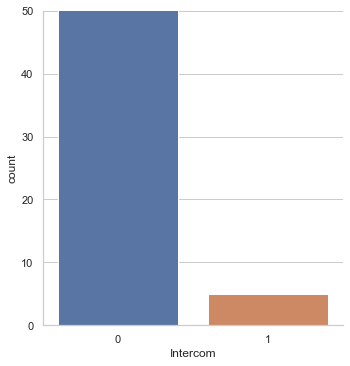

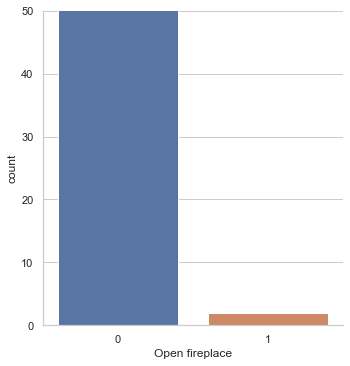

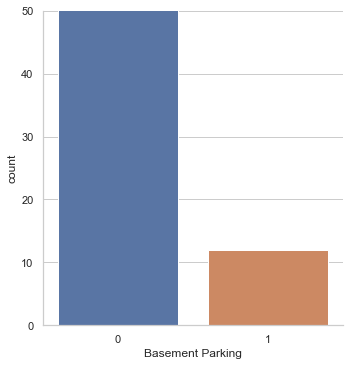

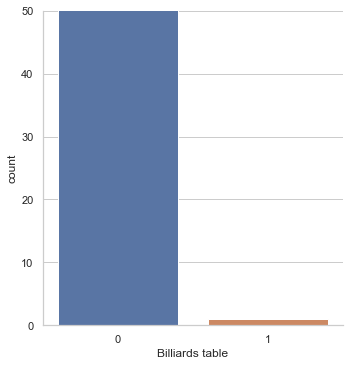

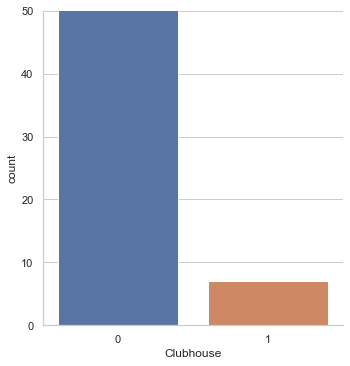

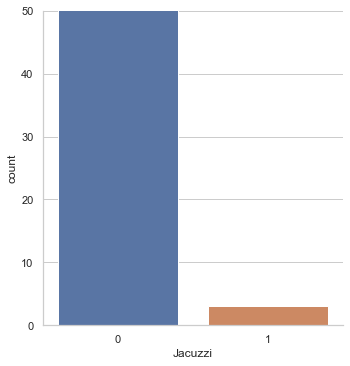

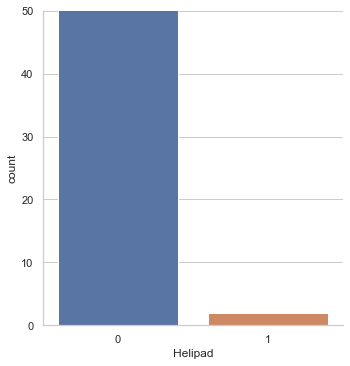

In [41]:
for a in amenities:
    dayc_plot = sns.catplot(x = data[a], kind="count", data=data)
    dayc_plot.set(ylim=(0, 50))

The following amenities are offered to more than 20 condominiums for rent:
1. Swimming pool
2. Gym
3. Air Conditioning
4. 24-hour Security
5. Fire Exits
6. Lobby
7. Fire Sprinkler System
8. Fire Alarm
9. Elevators
10. CCTV
11. Alarm System

### Average Number of Amenities offered per City

In [22]:
ave_ams_city = data.groupby('city', as_index = False)['num_amenities'].mean()
ave_ams_city = ave_ams_city.rename(columns={"num_amenities" : "average_number_ams"}, errors="raise")
ave_ams_city.head()

,city,average_number_ams
0,Las Piñas,3.000000
1,Makati,16.536364
2,Mandaluyong,15.732673
3,Manila,17.750000
4,Muntinlupa,20.285714


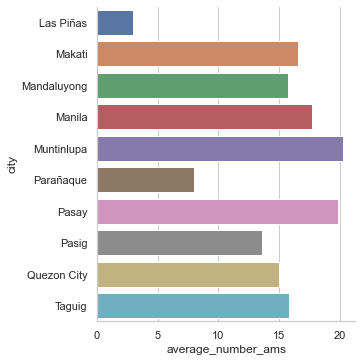

In [23]:
sns.set_theme(style="whitegrid")
ams_plot = sns.catplot(y = "city", x="average_number_ams", orient="h", kind="bar", data=ave_ams_city)

Muntinlupa and Pasay city has the highest average number of amenties offered.

### Average floorarea per city

In [13]:
bthroom = data["city"].value_counts().rename_axis('city').reset_index(name='counts')
bthroom = bthroom.nlargest(10, 'counts')
bthroom

,city,counts
0,Makati,756
1,Taguig,684
2,Quezon City,218
3,Pasig,138
4,Mandaluyong,115
5,Manila,41
6,Pasay,33
7,Muntinlupa,9
8,Parañaque,6
9,Las Piñas,1


In [28]:
ave_price_city = data.groupby('city', as_index = False)['price'].mean()
ave_price_city = ave_price_city.rename(columns={"price" : "average_price"}, errors="raise")
ave_price_city.head()

,city,average_price
0,Las Piñas,40000.000000
1,Makati,89942.585979
2,Mandaluyong,30925.217391
3,Manila,17028.048780
4,Muntinlupa,35722.222222


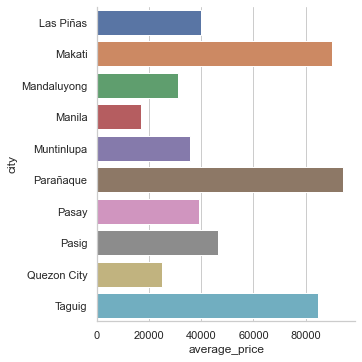

In [29]:
sns.set_theme(style="whitegrid")
bth_plot = sns.catplot(y = "city", x="average_price", orient="h", kind="bar", data=ave_price_city)

Average rent price of condominium, the most expensive ones are above 80,000

In [30]:
ave_city_floor = data.groupby('city', as_index = False)['floorarea (m²)'].mean()
ave_city_floor = ave_city_floor.rename(columns={"floorarea (m²)" : "average_floorarea"}, errors="raise")
ave_city_floor.head()

,city,average_floorarea
0,Las Piñas,48.000000
1,Makati,100.305556
2,Mandaluyong,51.443478
3,Manila,31.560976
4,Muntinlupa,47.000000


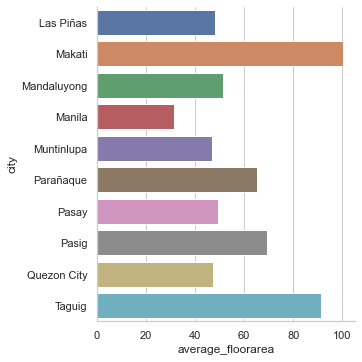

In [31]:
sns.set_theme(style="whitegrid")
bth_plot = sns.catplot(y = "city", x="average_floorarea", orient="h", kind="bar", data=ave_city_floor)

Average floor area per city, Makati has the highest floor area, averanging to 100m²